In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data from dataset

# exams: 100x3
exams = np.loadtxt('datasets/exams.txt', delimiter=",")

# X_data: 100x2, X: 100x3
X_data = np.array(exams[:, :2])
X = np.insert(X_data,0,1,axis=1)

# y: 100x1
y = np.array(exams[:, 2][np.newaxis]).T

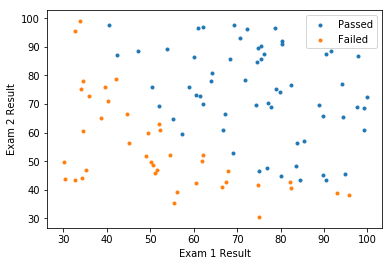

In [3]:
# Filter for 1 and 0 values
positive = np.where(exams[:, 2] > 0);
negative = np.where(exams[:, 2] < 1);

# Visualize data
plt.figure(1)
plt.scatter(exams[positive, 0], exams[positive, 1], marker='.', label='Passed')
plt.scatter(exams[negative, 0], exams[negative, 1], marker='.', label='Failed')
plt.xlabel('Exam 1 Result')
plt.ylabel('Exam 2 Result')
plt.legend()

In [4]:
# Defining important Variables

# Theta: 1x3
Theta = np.array([0,0,0])[np.newaxis].T
m = X.shape[0]
alpha = 0.01
lamb = 3
iterations = 1500

# Initializing cost_development to track progress
cost_development = np.zeros((iterations, 1))

In [5]:
# Defining Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [24]:
# Defining cost function
def cost(X, y, Theta, lamb, m):
    z = np.dot(X, Theta)
    h = sigmoid(z)
    J = np.dot((1/m), (-y * np.log(h) - (1 - y) * np.log(1 - h)).sum())
    reg = lamb/(2*m) * Theta[:, :2].sum()
    return J + reg
    
cost(X, y, Theta, lamb, m)

0.6931471805599453

In [25]:
# Performing gradient descent
def grad_descent(X, y, m, alpha, Theta, iterations):
    for i in range(iterations):
        z = np.dot(X, Theta)
        h = sigmoid(z)
        Theta = Theta - alpha * np.dot(alpha, np.dot((h - y).T, X)).T
        cost_development[i] = [cost(X, y, Theta, lamb, m)]
    return Theta

In [26]:
grad_descent(X, y, m, alpha, Theta, iterations)

/Users/dan/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/dan/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


array([[-1.14871686],
       [ 0.56980921],
       [ 0.11139426]])